# Mohammad Amin Rami

# Student ID: 98101588
## Deep Learning HW2
## Question 2

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part A

In [2]:
raw_data = pd.read_csv('Data/HW2_data/international_matches.csv')
raw_data.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


### Part B

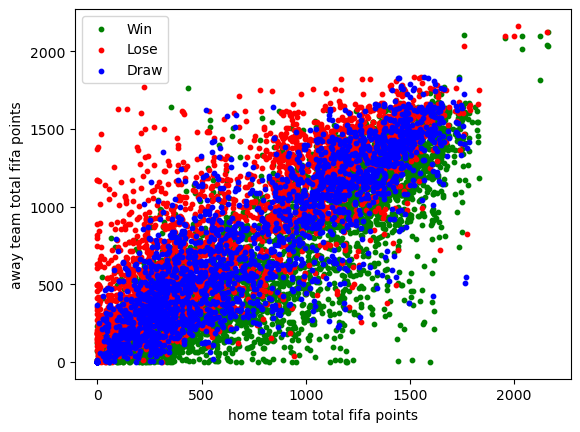

In [3]:


home_team_win = raw_data[raw_data['home_team_result'] == 'Win']
home_team_lose = raw_data[raw_data['home_team_result'] == 'Lose']
home_team_draw = raw_data[raw_data['home_team_result'] == 'Draw']

s = 10
win = plt.scatter(home_team_win['home_team_total_fifa_points'], home_team_win['away_team_total_fifa_points'], c='green', s=s)
lose = plt.scatter(home_team_lose['home_team_total_fifa_points'], home_team_lose['away_team_total_fifa_points'], c='red', s=s)
draw = plt.scatter(home_team_draw['home_team_total_fifa_points'], home_team_draw['away_team_total_fifa_points'], c='blue', s=s)
plt.xlabel('home team total fifa points')
plt.ylabel('away team total fifa points')
plt.legend((win, lose, draw), ('Win', 'Lose', 'Draw'))
plt.show()

### Part C

In [4]:
data = raw_data[['home_team_fifa_rank', 
                 'away_team_fifa_rank', 
                 'home_team_total_fifa_points', 
                 'away_team_total_fifa_points', 
                 'home_team_result']]
data = data[(data['home_team_total_fifa_points'] != 0) & (data['away_team_total_fifa_points'] != 0)]

In [5]:
coder = {'Lose': 0, 'Draw': 1, 'Win': 2}

train = data.sample(frac=0.75)
test = data.drop(train.index)

train['home_team_result'] = train['home_team_result'].map(coder)
test['home_team_result'] = test['home_team_result'].map(coder)

### Part D

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points
home_team_fifa_rank,1.000000,0.513231,-0.577494,-0.295077
away_team_fifa_rank,0.513231,1.000000,-0.273496,-0.548333
home_team_total_fifa_points,-0.577494,-0.273496,1.000000,0.801157
away_team_total_fifa_points,-0.295077,-0.548333,0.801157,1.000000


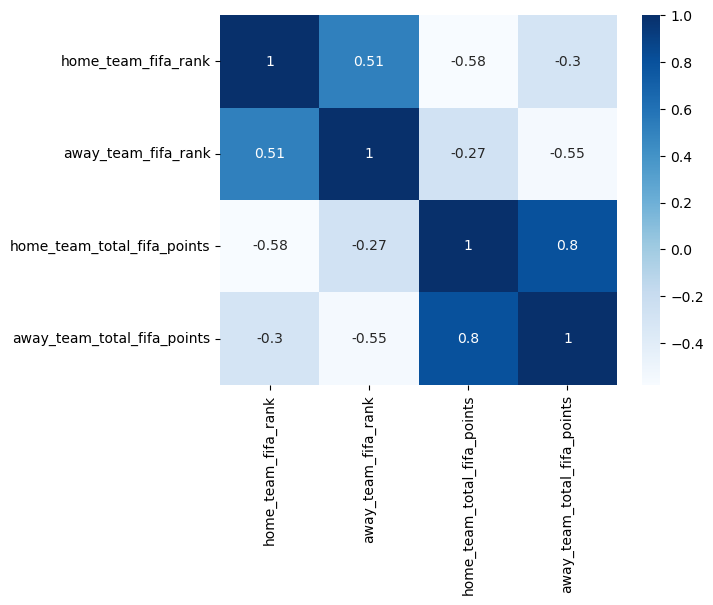

In [6]:
x_train = train.iloc[:, 0:-1]
sns.heatmap(x_train.corr(), annot=True, cmap='Blues')
x_train.corr()

### Part E

In [7]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np


class SoccerDataSet(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        data = np.array(data)
        self.x_np = np.array(data[:, 0:-1])
        self.y_np = np.array(data[:, -1])
        self.x = torch.from_numpy(self.x_np)
        self.y = torch.from_numpy(self.y_np)
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return self.y_np.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx, :], self.y[idx]

training_set = SoccerDataSet(train)
test_data = SoccerDataSet(test)

train_loader = DataLoader(training_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [8]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.relu_stack = nn.Sequential(
            nn.Linear(input_dim, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 3),
            nn.ReLU()
        )
        self.soft = nn.Softmax()
    
    def forward(self, x):
        x = self.relu_stack(x)
        x = self.soft(x)
        return x

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork(input_dim=4).to(device)
print(model)

NeuralNetwork(
  (relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
    (7): ReLU()
  )
  (soft): Softmax(dim=None)
)


In [10]:
model.train()

NeuralNetwork(
  (relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
    (7): ReLU()
  )
  (soft): Softmax(dim=None)
)

In [11]:
learning_rate = 5e-3
batch_size = 64
epochs = 25

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X.float())
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Part F

### Training Phase

#### Warning: If the accuracy does not exceed 55%, re-run the training phase. Because of the randomness of the training phase, sometimes the accuracy might be less than 55%

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")
    test_loop(test_loader, model, loss_fn)
    train_loop(train_loader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 24.4%, Avg loss: 1.280932 

loss: 1.254782  [    0/ 7196]
loss: 1.067316  [ 6400/ 7196]
Epoch 2
-------------------------------
Test Error: 
 Accuracy: 48.7%, Avg loss: 1.055980 

loss: 0.994159  [    0/ 7196]


/tmp/ipykernel_11136/1120925751.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.soft(x)


loss: 1.166126  [ 6400/ 7196]
Epoch 3
-------------------------------
Test Error: 
 Accuracy: 48.9%, Avg loss: 1.054371 

loss: 1.160822  [    0/ 7196]
loss: 1.109093  [ 6400/ 7196]
Epoch 4
-------------------------------
Test Error: 
 Accuracy: 49.0%, Avg loss: 1.047848 

loss: 1.068709  [    0/ 7196]
loss: 1.018567  [ 6400/ 7196]
Epoch 5
-------------------------------
Test Error: 
 Accuracy: 49.1%, Avg loss: 1.047439 

loss: 1.051631  [    0/ 7196]
loss: 1.071799  [ 6400/ 7196]
Epoch 6
-------------------------------
Test Error: 
 Accuracy: 46.0%, Avg loss: 1.067653 

loss: 1.041556  [    0/ 7196]
loss: 1.069003  [ 6400/ 7196]
Epoch 7
-------------------------------
Test Error: 
 Accuracy: 48.7%, Avg loss: 1.036593 

loss: 1.053672  [    0/ 7196]
loss: 0.988541  [ 6400/ 7196]
Epoch 8
-------------------------------
Test Error: 
 Accuracy: 49.0%, Avg loss: 1.036189 

loss: 0.999777  [    0/ 7196]
loss: 1.107819  [ 6400/ 7196]
Epoch 9
-------------------------------
Test Error: 
 Accu

### Part G

In [15]:
irn_eng = torch.Tensor([20,5,1564.61,1728.47])
irn_wal = torch.Tensor([20,19,1564.61,1569.82])
iran_us = torch.Tensor([20,16,1564.61,1627.48])

pred = [0,0,0]
pred[0] = model(irn_eng.float())
pred[1] = model(irn_wal.float())
pred[2] = model(iran_us.float())

def result(res):
    if res == 0:
        print('Iran loses')
    elif res == 1:
        print('Iran will get a draw')
    else:
        print('Iran wins')


print("Result of IRAN VS ENGLAND")
res = torch.argmax(pred[0][:])
result(res)
    
print("Result of IRAN VS WALES")
res = torch.argmax(pred[1][:])
result(res)
    
print("Result of IRAN VS USA")
res = torch.argmax(pred[2][:])
result(res)

Result of IRAN VS ENGLAND
Iran loses
Result of IRAN VS WALES
Iran wins
Result of IRAN VS USA
Iran loses


/tmp/ipykernel_11136/1120925751.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.soft(x)
